# Automated ECG Analysis Pipeline
 
This notebook demonstrates a complete pipeline for analyzing an ECG signal from the PTB Diagnostic ECG Database. The process includes loading data, filtering, R-peak detection, and Heart Rate Variability (HRV) analysis.

In [4]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# To import our processing functions from the src/ directory,
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import load_ecg_record, filter_signal, find_r_peaks, calculate_hrv_metrics

# Set plotting style
plt.style.use('ggplot')

In [5]:
record_name = 'patient001/s0010_re'

# Load the data using our pipeline function
record = load_ecg_record(record_name=record_name)

if record:
    # Extract the raw signal (Lead I) and sampling frequency
    raw_signal = record.p_signal[:, 0]
    fs = record.fs

    # Filter the signal
    filtered_signal = filter_signal(signal=raw_signal, fs=fs)

    # Find R-peaks
    r_peaks = find_r_peaks(signal=filtered_signal, fs=fs)
    
    print(f"Processing complete for record: {record_name}")
    print(f"Detected {len(r_peaks)} R-peaks.")
else:
    print(f"Failed to load record: {record_name}")

Record 'patient001/s0010_re' not found locally. Downloading...
Created local base download directory: /Users/simonmejia/Desktop/GitHub/data/raw
Finished downloading files
Download complete.
Loading record 'patient001/s0010_re' from local directory.
Processing complete for record: patient001/s0010_re
Detected 52 R-peaks.


## Visualize the Filtering Effect
 
 To verify that our bandpass filter is working correctly, we can plot a segment of the raw signal and compare it to the filtered signal. We expect to see the baseline wander and high-frequency noise removed.

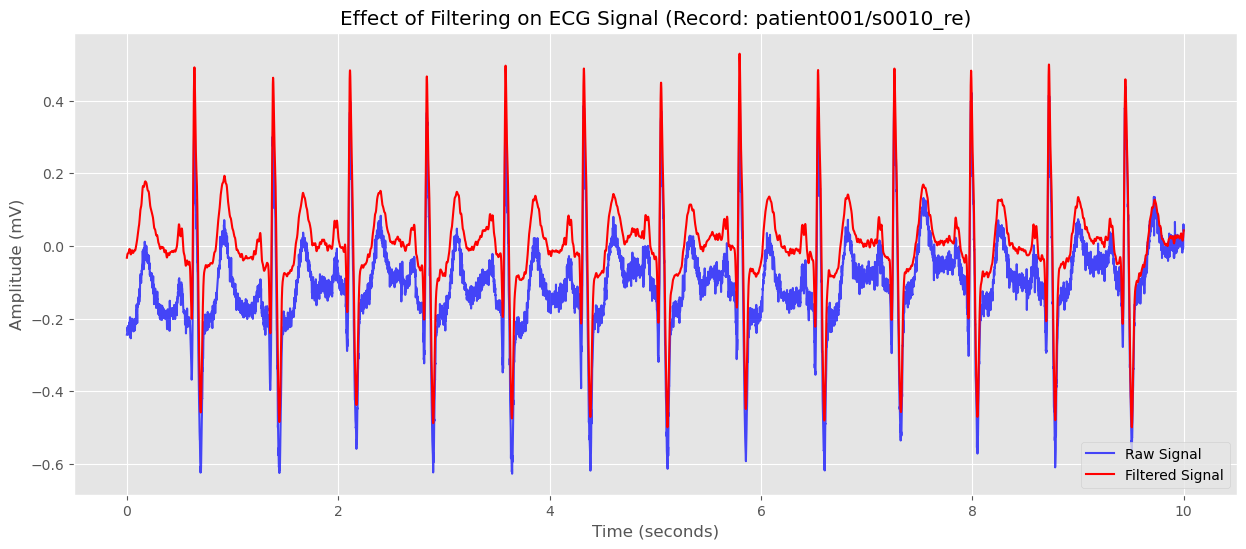

In [6]:
# Create a time axis for plotting (in seconds)
time_axis = np.arange(len(raw_signal)) / fs

# Define a time range to zoom in on for a clearer plot (e.g., first 10 seconds)
start_time = 0
end_time = 10
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(time_axis[start_index:end_index], raw_signal[start_index:end_index], label='Raw Signal', color='blue', alpha=0.7)
ax.plot(time_axis[start_index:end_index], filtered_signal[start_index:end_index], label='Filtered Signal', color='red', linewidth=1.5)

ax.set_title(f'Effect of Filtering on ECG Signal (Record: {record_name})')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude (mV)')
ax.legend()
ax.grid(True)

plt.show()

## Visualize R-Peak Detection
Now, let's plot the filtered signal and overlay the locations of the R-peaks we detected. This is the most important validation step to ensure our peak detection algorithm is accurate.

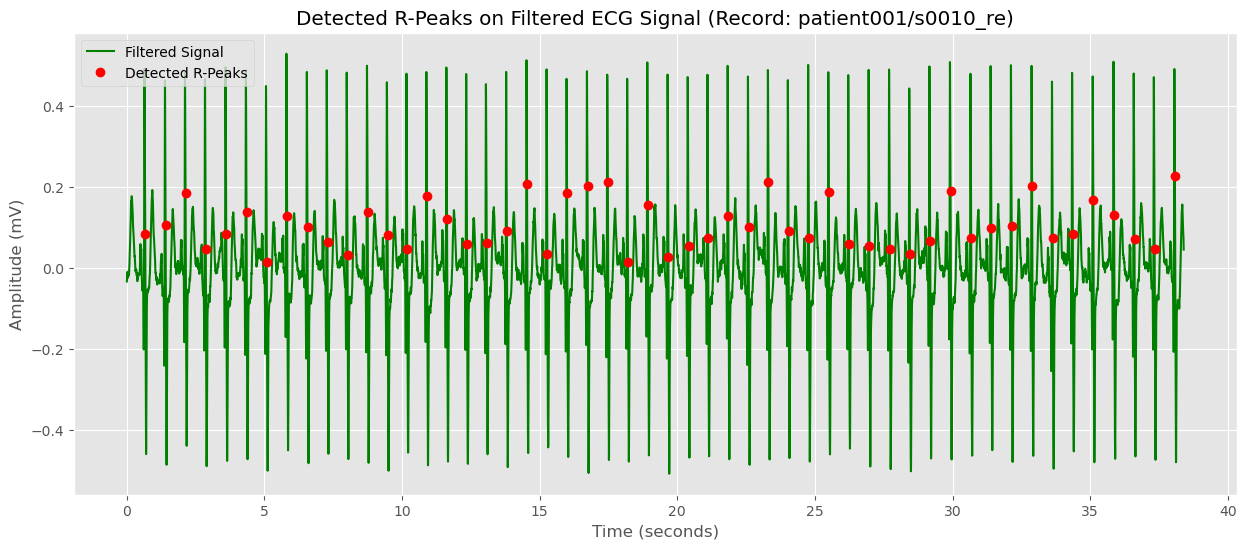

In [7]:
# Plot the filtered signal
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(time_axis, filtered_signal, label='Filtered Signal', color='green')

# Plot the detected R-peaks as red dots
# We need to get the time and amplitude for each R-peak
r_peak_times = r_peaks / fs
r_peak_amplitudes = filtered_signal[r_peaks]
ax.plot(r_peak_times, r_peak_amplitudes, 'ro', label='Detected R-Peaks')

ax.set_title(f'Detected R-Peaks on Filtered ECG Signal (Record: {record_name})')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude (mV)')
ax.legend()
ax.grid(True)

plt.show()

## Display HRV Analysis Results

Finally, we calculate and display the time-domain HRV metrics from the detected R-peaks.


In [8]:
# Calculate HRV Metrics using our pipeline function
hrv_metrics = calculate_hrv_metrics(r_peaks=r_peaks, fs=fs)

print("--- Heart Rate Variability (HRV) Analysis ---")
print(f"Mean RR Interval: {hrv_metrics['mean_rr']} ms")
print(f"SDNN (Standard Deviation of NN intervals): {hrv_metrics['sdnn']} ms")
print(f"RMSSD (Root Mean Square of Successive Differences): {hrv_metrics['rmssd']} ms")

# Calculate average heart rate
mean_hr = 60000 / hrv_metrics['mean_rr']
print(f"\nAverage Heart Rate: {mean_hr:.2f} bpm")

--- Heart Rate Variability (HRV) Analysis ---
Mean RR Interval: 733.51 ms
SDNN (Standard Deviation of NN intervals): 9.64 ms
RMSSD (Root Mean Square of Successive Differences): 11.96 ms

Average Heart Rate: 81.80 bpm
